In [1]:
import time
import os
import pandas as pd
from combined import run_app_analysis_workflow_with_categories, analyze_and_evaluate_json_files ,full_workflow

###  Use this for Scraping and Analyse the App From the Keyword 

In [2]:
# --- Example 1 ---
# --- Default Categories to Scrape ---
CATEGORIES_TO_SCRAPE = {
    "Dating100": "Dating app"
}

# --- Main Execution Block ---
if __name__ == "__main__":
    print("Running main workflow with default categories and configurations...")
    run_app_analysis_workflow_with_categories(CATEGORIES_TO_SCRAPE) # Run with default categories and configurations



Running main workflow with default categories and configurations...
--- Starting Full Scrape, Analyze, Evaluate Workflow ---

--- Phase 1: Scraping App Data ---

  SCRAPER WARNING: Running without proxies. Failures/blocks likely.


--------------------------------------------------
Scraping Category 1/1: ID 'Dating100', Search: 'Dating app'
--------------------------------------------------
  Starting search...
  Searching 'Dating app' without proxy.
  [SUCCESS] Found 22 unique IDs for 'Dating app' directly.

  Starting parallel detail fetching for 22 apps...
  Max Retries Per App: 5 | Max Workers: 18
    [SUCCESS] Fetched com.hily.app directly.
    [SUCCESS] Fetched com.takimi.android directly.
    [SUCCESS] Fetched com.pof.android directly.
    [SUCCESS] Fetched com.dating.android directly.
    [SUCCESS] Fetched com.litatom.app directly.
    [SUCCESS] Fetched com.p1.mobile.putong directly.
    [SUCCESS] Fetched com.kismia.app directly.
    [SUCCESS] Fetched com.ftw_and_co.happn direc

2025-03-30 11:29:46,400 - INFO - Found 4 previously processed app IDs in 'app_analysis_results.csv'.
2025-03-30 11:29:46,400 - INFO - Processing file 1/1: scraped_app_data\Dating100_details.json


    [SUCCESS] Fetched co.hinge.app directly.

  Finished parallel detail fetching in 11.84 seconds.
  Successfully fetched details for 22 out of 22 app IDs.
  Saved details for 22 apps to 'scraped_app_data\Dating100_details.json'
Category 'Dating100' scraping took 15.05 seconds.

--- Scraping Complete ---

Scraping phase complete. Found/Generated 1 JSON files.

--- Phase 2: Analyzing Apps with LLM ---


KeyboardInterrupt: 

In [2]:
# --- Remove the app_analysis_result file before runing this ---
if os.path.exists('app_analysis_results.csv'):
    os.remove('app_analysis_results.csv')
    print("Removed existing app_analysis_results.csv file.")

Removed existing app_analysis_results.csv file.


### Analysing the Test Data

In [3]:


# --- Default Categories to Scrape ---
# --- Change if you want to analyze another json file ---
json_files_to_analyze = ['test data/fraud-apps.json', 'test data/genuine-apps.json']
# --- Main Execution Block ---
if __name__ == "__main__":
    print("Running main workflow with default categories and configurations...")
    analyze_and_evaluate_json_files(json_files_to_analyze)

2025-03-29 23:50:48,288 - INFO - Found 0 previously processed app IDs in 'app_analysis_results.csv'.
2025-03-29 23:50:48,293 - INFO - Processing file 1/2: test data/fraud-apps.json


Running main workflow with default categories and configurations...
--- Starting Analyze and Evaluate JSON Files Workflow ---

--- Phase 1: Using Provided JSON Files (Skipping Scraping) ---
Using provided JSON files for analysis: ['test data/fraud-apps.json', 'test data/genuine-apps.json']

--- Phase 2: Analyzing Apps with LLM ---


2025-03-29 23:50:48,949 - INFO - Analyzing App ID: app.chart.ai
2025-03-29 23:50:54,709 - INFO - Analyzing App ID: calculator.loancalculator.financecalculator.loan
2025-03-29 23:50:59,152 - INFO - Analyzing App ID: cashloan.emi.loan.calculator.emis.calculates
2025-03-29 23:51:03,518 - INFO - Analyzing App ID: co.median.android.ayxnbp
2025-03-29 23:51:08,022 - WARNING - LLM reason exceeded char limit (337>300), truncating.
2025-03-29 23:51:08,028 - INFO - Analyzing App ID: co.median.android.eakmkm
2025-03-29 23:51:12,628 - WARNING - LLM reason exceeded char limit (315>300), truncating.
2025-03-29 23:51:12,630 - INFO - Analyzing App ID: com.Balooshy
2025-03-29 23:51:17,136 - INFO - Analyzing App ID: com.akab.loanguru.loanemicalc.easyemicalculator
2025-03-29 23:51:21,539 - INFO - Analyzing App ID: com.akab.loanpro.easycalculate.emicalculator
2025-03-29 23:51:25,944 - INFO - Analyzing App ID: com.appsrx.rxminer
2025-03-29 23:51:30,394 - WARNING - LLM reason exceeded char limit (359>300), t


Analysis phase complete. Results should be in 'app_analysis_results.csv'.


2025-03-29 23:58:24,264 - INFO - Starting evaluation process for: app_analysis_results.csv
2025-03-29 23:58:24,303 - INFO - Loaded 100 rows from CSV.
2025-03-29 23:58:24,303 - INFO - Applying classification logic...
2025-03-29 23:58:24,315 - INFO - Attempting to save processed data back to: app_analysis_results.csv
2025-03-29 23:58:24,323 - INFO - Successfully overwrote 'app_analysis_results.csv' with processed data (100 rows).
2025-03-29 23:58:24,323 - INFO - Evaluation complete (file overwritten).
2025-03-29 23:58:24,328 - INFO - Saved Type distribution ('type'):
type
0    56
1    39
2     5
Name: count, dtype: Int64



--- Phase 3: Evaluating Analysis Results ---

Evaluation phase complete.

--- Analyze and Evaluate JSON Files Workflow Finished ---
Total execution time: 456.04 seconds


In [4]:
df= pd.read_csv('app_analysis_results.csv')
genuine_apps = pd.read_json('test data/genuine-apps.json')
fraud_apps = pd.read_json('test data/fraud-apps.json')

In [5]:
#if df appid in genuine_apps appid then genuine else fraud
df['original_label'] = df['app_id'].apply(lambda x: 1 if x in genuine_apps['appId'].values else 0)


--- Classification Metrics ---
Accuracy: 0.8800

Confusion Matrix:


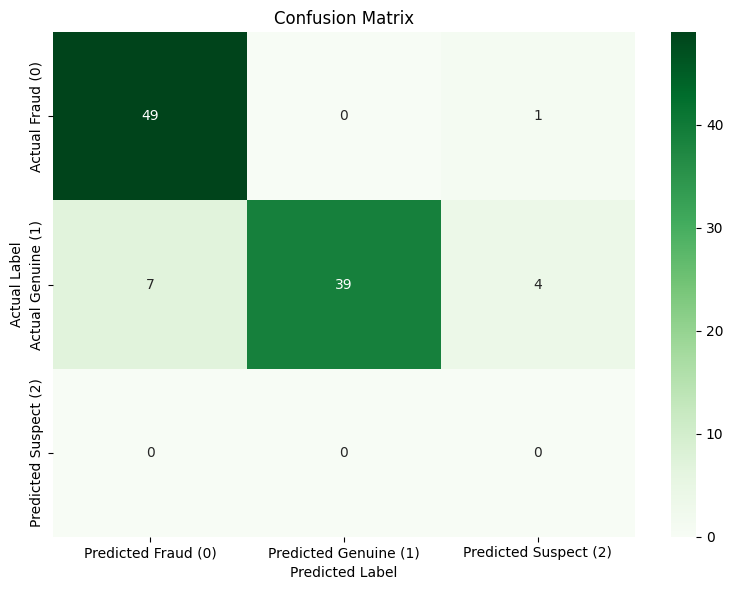


Classification Report:
              precision  recall  f1-score  support
0                0.8750    0.98  0.924528    50.00
1                1.0000    0.78  0.876404    50.00
2                0.0000    0.00  0.000000     0.00
accuracy         0.8800    0.88  0.880000     0.88
weighted avg     0.9375    0.88  0.900466   100.00


In [6]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = df['type']
y_true = df['original_label']
print("\n--- Classification Metrics ---")

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
# print(conf_matrix)
# To make it more readable with labels:
conf_matrix_df = pd.DataFrame(conf_matrix,
                               index=['Actual Fraud (0)', 'Actual Genuine (1)','Predicted Suspect (2)'],
                               columns=['Predicted Fraud (0)', 'Predicted Genuine (1)', 'Predicted Suspect (2)']) # Adjust columns if needed
title="Confusion Matrix"

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(conf_matrix_df, annot=True, cbar=True,cmap=plt.cm.Greens) # fmt for annotation format
plt.title(title)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

# print(conf_matrix_df)


# Classification Report (Precision, Recall, F1-Score, Support)
class_report = classification_report(y_true, y_pred,zero_division=0 , output_dict=True)
print("\nClassification Report:")

del class_report['macro avg']
# Print without macro avg
import pandas as pd
class_report = pd.DataFrame(class_report).transpose()
print(class_report)

In [ ]:
# --- Full Workflow Execution ---
CATEGORIES_TO_SCRAPE = {
    "Finance1000": "finance"
}

# --- Main Execution Block ---
if __name__ == "__main__":
    print("Running full workflow with default categories and configurations...")
    full_workflow(categories_to_scrape=CATEGORIES_TO_SCRAPE)

Running full workflow with default categories and configurations...

--- Starting Full Workflow ---

--- Step 1: Scraping ---

Scraping large category: ID 'Finance1000', Search: 'finance'
Node.js script stdout:
Saved 200 apps to scraped_app_data\Finance1000_details.json
[{"title":"Yahoo Finance: Stocks & News","appId":"com.yahoo.mobile.client.android.finance","url":"https://play.google.com/work/apps/details?id=com.yahoo.mobile.client.android.finance","icon":"https://play-lh.googleusercontent.com/jQVXIz4MbsuOJSzoeFsTeL2gHoaZTlBtz2JbyG9JAuhsrTPB2vSvsRqsINWYVUr3Xw","developer":"Yahoo","developerId":"5536369398281991413","price":null,"free":false,"summary":"Breaking Financial News about the market, Stocks, Crypto &amp; Portfolio Tracking","scoreText":"4.5","score":4.525466},{"title":"Investing.com: Stock Market","appId":"com.fusionmedia.investing","url":"https://play.google.com/work/apps/details?id=com.fusionmedia.investing","icon":"https://play-lh.googleusercontent.com/sg32n8o-oKmUTgFR8D6